# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/diabetes_feature.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [29]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan',
       'low_glu_insulin']]

In [30]:
y = df[['Outcome']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.2, random_state=42)

In [32]:
X_train.shape, y_test.shape

((614, 10), (154, 1))

In [33]:
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,0,28.2,1.282,50,True,169.5,False
346,139,46,19,83,28.7,0.654,22,False,83.0,False
294,161,50,0,0,21.9,0.254,65,False,102.5,False
231,134,80,37,370,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...,...
71,139,64,35,140,28.6,0.411,26,False,140.0,False
106,96,122,0,0,22.4,0.207,27,False,102.5,True
270,101,86,37,0,45.6,1.136,38,True,169.5,False
435,141,0,0,0,42.4,0.205,29,False,169.5,False


# 학습과 예측하기

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
y_predict = model.predict(X_test)

In [38]:
y_predict[:5]



array([1, 0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571

## 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [41]:
model.fit(X_train, y_train)

C:\Users\asdfa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
y_predict = model.predict(X_test)

In [43]:
accuracy_score(y_test, y_predict)

0.8636363636363636

In [44]:
model.feature_importances_

array([0.15392365, 0.03902306, 0.05215848, 0.10090017, 0.08085641,
       0.05465322, 0.08828809, 0.01118052, 0.38146849, 0.03754789])

In [45]:
feature_names = X_train.columns.tolist()

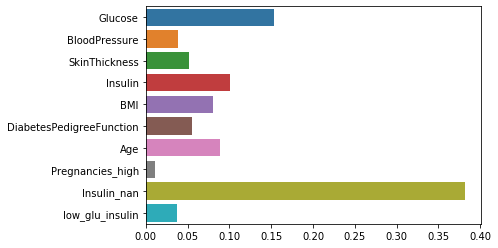

In [46]:
sns.barplot(x=model.feature_importances_, y=feature_names)

## GradientBoostingClassifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
model1 = GradientBoostingClassifier(random_state=42)
model1

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
model1.fit(X_train, y_train)

C:\Users\asdfa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
model1.feature_importances_

array([1.13992659e-01, 6.58293798e-03, 1.93038911e-02, 1.96438502e-01,
       3.39849492e-02, 2.47268958e-02, 7.60046953e-02, 3.16838064e-04,
       5.28648632e-01, 0.00000000e+00])

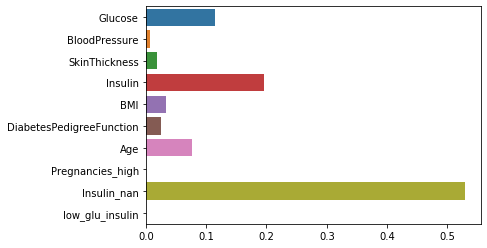

In [69]:
sns.barplot(x=model1.feature_importances_, y=feature_names)

In [70]:
y_predict = model1.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_test, y_predict)

0.8636363636363636

## RandomizedSearchCV로 modeling하기
- 여러 개의 알고리즘을 사용해서 비교하기

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [89]:
estimators = [DecisionTreeClassifier(random_state=42),
            RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            
            ]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [99]:
results = []

for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [105]:
max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {'max_depth': max_depth,
                       'max_features': max_features}


results = []
for estimator in estimators:
        result=[]
#         if estimator.__class__.__name__ != 'DecisionClassifier':
#             param_distributions['n_estimators'] = np.random.randint(100,100,10)
            
        clf = RandomizedSearchCV(estimator,
                        param_distributions,
                        n_iter=100,
                        scoring="accuracy",
                        n_jobs=-1,
                        cv=5,
                        verbose=2
         )


        clf.fit(X_train, y_train)
        result.append(estimator.__class__.__name__)
        result.append(clf.best_params_)
        result.append(clf.best_score_)
        result.append(clf.score(X_test, y_test))
        result.append(clf.cv_results_)
        results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.1s finished
C:\Users\asdfa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.4s finished
C:\Users\asdfa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
model_result = pd.DataFrame(results, columns = ['estimator', 'best_params_', 'train_score',
                                 'test_score', 'cv_result'])

In [110]:
model_result

,estimator,best_params_,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.8775882856968844, 'max_dept...",0.884380,0.876623,"{'mean_fit_time': [0.0035902023315429687, 0.00..."
1,RandomForestClassifier,"{'max_features': 0.8775882856968844, 'max_dept...",0.900693,0.863636,"{'mean_fit_time': [0.21688308715820312, 0.2421..."
2,GradientBoostingClassifier,"{'max_features': 0.35914650926645725, 'max_dep...",0.899027,0.870130,"{'mean_fit_time': [0.5331746101379394, 0.54604..."


In [111]:
pd.DataFrame(model_result.loc[1, 'cv_result']).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,0.253439,0.002370,0.013494,0.000889,0.877588,7,"{'max_features': 0.8775882856968844, 'max_dept...",0.878049,0.943089,0.853659,0.902439,0.926230,0.900693,0.032180,1
48,0.228092,0.008948,0.013502,0.000767,0.413538,7,"{'max_features': 0.41353834033809733, 'max_dep...",0.861789,0.943089,0.886179,0.894309,0.918033,0.900680,0.027796,2
46,0.229946,0.006728,0.013625,0.001869,0.494894,7,"{'max_features': 0.49489448541461867, 'max_dep...",0.861789,0.943089,0.886179,0.894309,0.918033,0.900680,0.027796,2
93,0.215050,0.017010,0.013067,0.000243,0.359147,3,"{'max_features': 0.35914650926645725, 'max_dep...",0.837398,0.926829,0.894309,0.902439,0.934426,0.899080,0.034229,4
53,0.225724,0.007197,0.012596,0.000793,0.359147,3,"{'max_features': 0.35914650926645725, 'max_dep...",0.837398,0.926829,0.894309,0.902439,0.934426,0.899080,0.034229,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.212542,0.005262,0.014264,0.001661,0.561733,2,"{'max_features': 0.5617330437838356, 'max_dept...",0.796748,0.886179,0.861789,0.853659,0.926230,0.864921,0.042414,94
79,0.236580,0.014086,0.013165,0.000747,0.528753,2,"{'max_features': 0.5287532676952718, 'max_dept...",0.796748,0.886179,0.861789,0.853659,0.926230,0.864921,0.042414,94
75,0.284152,0.004951,0.019748,0.000746,0.637849,2,"{'max_features': 0.6378491856473953, 'max_dept...",0.796748,0.869919,0.861789,0.837398,0.926230,0.858417,0.042396,98
74,0.267301,0.017313,0.020545,0.001196,0.877588,2,"{'max_features': 0.8775882856968844, 'max_dept...",0.764228,0.878049,0.861789,0.837398,0.918033,0.851899,0.051092,99


# 정답률 구하기

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8506493506493507